In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [3]:
#Clean and select data
data.dropna
data = data.iloc[0:, 1:]

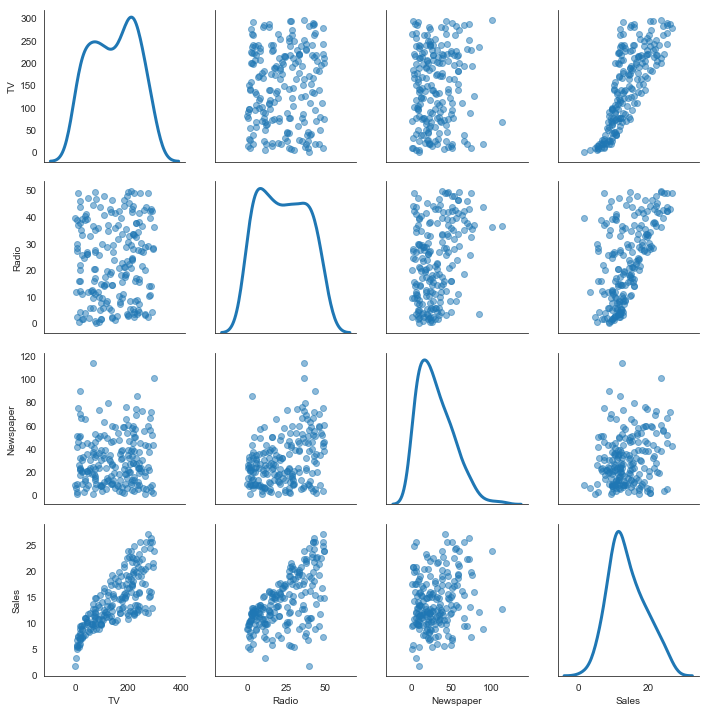

In [4]:
# Set the default plot aesthetics.
sns.set_style("white")

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(data, diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(plt.scatter, alpha=.5)

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()

#Some warnings will show up below because the plot does not include a legend.

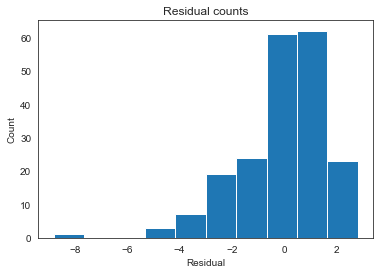

In [5]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

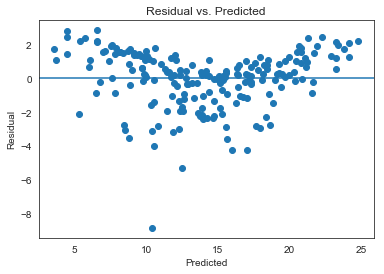

In [6]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [7]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.


In [8]:
import scipy
from scipy.stats.mstats import winsorize

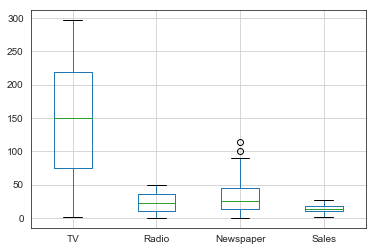

In [9]:
data.boxplot(column=['TV', 'Radio', 'Newspaper','Sales'])

plt.show()

In [10]:
data.Newspaper = scipy.stats.mstats.winsorize(data.Newspaper, limits=0.08).tolist()
data.TV = scipy.stats.mstats.winsorize(data.TV, limits=0.08)
data.Radio = scipy.stats.mstats.winsorize(data.Radio, limits=0.08)
data.Sales = scipy.stats.mstats.winsorize(data.Sales, limits=0.08)

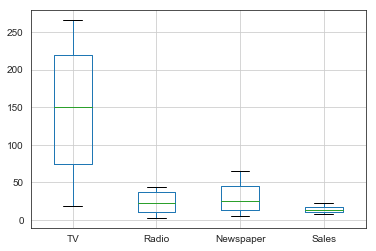

In [11]:
data.boxplot(column=['TV', 'Radio', 'Newspaper','Sales'])

plt.show()

In [12]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04259215  0.18079996 -0.00322939]]

Intercept: 
 [3.68419504]

R-squared:
0.9067863376008948


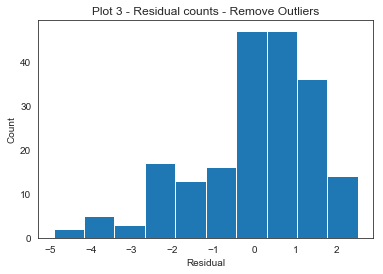

In [13]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Plot 3 - Residual counts - Remove Outliers')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [15]:
#Transform TV feature distribution
data['TV_sqrt'] = np.sqrt(data['TV'])
X = data[['TV_sqrt','Radio','Newspaper']]

In [16]:
#Transform TV feature distribution
data['Radio_sqrt'] = np.sqrt(data['Radio'])
X = data[['TV_sqrt','Radio_sqrt','Newspaper']]

In [17]:
#Transform TV feature distribution
data['Newspaper_sqrt'] = np.sqrt(data['Newspaper'])
X = data[['TV_sqrt','Radio_sqrt','Newspaper_sqrt']]

In [19]:
data['Sales_sqrt'] = np.sqrt(data['Sales'])

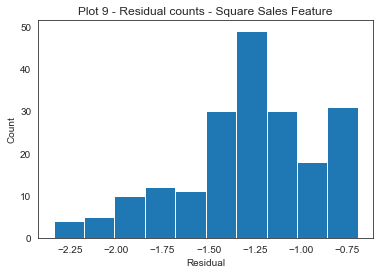

In [20]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales_sqrt']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Plot 9 - Residual counts - Square Sales Feature')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

